# Room Cancellation Classification

In this assignment, you will be performing EDA and predictive modelling on a dataset of hotel reservations. The dataset is available from the attached `hotel_bookings.csv` file.

In this Jupyter notebook, please, document your results and the way you have obtained them. The results of each sub-question should be printed as the result of its corresponding cell.
Please make sure that the datasets and other outputs are easily identifiable, i.e. use descriptive names for as is suitable for each corresponding question.
Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner. _Please do not change the general structure of this notebook_. You can, however, **add additional markdown or code cells** if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

**Submission instructions**:
For submission, make a zip file containing your notebook and the attached dataset and name it as `<your_roll_number>_a3.zip` 

In [1]:
# Add all imports here

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
from matplotlib import pyplot as plt
# add more when required

rcParams["figure.figsize"] = 20, 10

In [133]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Data Description



[Original Source](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

This data consists of room reservations for two hotels: (i) a city hotel and (ii) a resort hotel. The columns are described as follows:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
|hotel                          |character | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
|is_canceled                    |double    | Value indicating if the booking was canceled (1) or not (0) |
|lead_time                      |double    | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|arrival_date_year              |double    | Year of arrival date|
|arrival_date_month             |character | Month of arrival date|
|arrival_date_week_number       |double    | Week number of year for arrival date|
|arrival_date_day_of_month      |double    | Day of arrival date|
|stays_in_weekend_nights        |double    | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|stays_in_week_nights           |double    |  Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|adults                         |double    | Number of adults|
|children                       |double    | Number of children|
|babies                         |double    |Number of babies |
|meal                           |character | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|country                        |character | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
|market_segment                 |character | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|distribution_channel           |character | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|is_repeated_guest              |double    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|previous_cancellations         |double    | Number of previous bookings that were cancelled by the customer prior to the current booking |
|previous_bookings_not_canceled |double    | Number of previous bookings not cancelled by the customer prior to the current booking |
|reserved_room_type             |character | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|assigned_room_type             |character | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|booking_changes                |double    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|deposit_type                   |character | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|agent                          |character | ID of the travel agency that made the booking |
|company                        |character | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
|days_in_waiting_list           |double    | Number of days the booking was in the waiting list before it was confirmed to the customer |
|customer_type                  |character | Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking|
|adr                            |double    | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
|required_car_parking_spaces    |double    | Number of car parking spaces required by the customer |
|total_of_special_requests      |double    | Number of special requests made by the customer (e.g. twin bed or high floor)|
|reservation_status             |character | Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|reservation_status_date        |double    | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|


## Part 0

The `children`, `adults` and `babies` columns cannot have a value of zero simultaneously. Filter out the rows, which show this behavior

In [3]:
# Your code here
df = df[(df['children'] != 0) & (df['adults'] != 0) & (df['babies'] != 0)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,...,No Deposit,5.0,NaN,0,Transient,133.83,0,2,Check-Out,2015-07-17
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,...,No Deposit,NaN,NaN,0,Transient,126.00,0,2,Check-Out,2015-07-23
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,...,No Deposit,5.0,NaN,0,Transient,133.50,1,2,Check-Out,2015-08-14
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,...,No Deposit,250.0,NaN,0,Transient,277.00,1,1,Check-Out,2015-08-15
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,...,No Deposit,242.0,NaN,0,Transient,255.00,0,2,Check-Out,2015-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117708,City Hotel,0,129,2017,August,31,5,2,2,2,...,No Deposit,14.0,NaN,0,Transient,155.00,0,3,Check-Out,2017-08-09
117758,City Hotel,0,169,2017,August,31,2,2,5,2,...,No Deposit,9.0,NaN,0,Transient,154.93,0,1,Check-Out,2017-08-09
118257,City Hotel,0,288,2017,August,33,17,1,3,2,...,No Deposit,14.0,NaN,0,Transient,44.00,0,3,Check-Out,2017-08-21
118265,City Hotel,0,208,2017,August,33,14,1,2,2,...,No Deposit,14.0,NaN,0,Transient,240.00,0,1,Check-Out,2017-08-17


## Part A - EDA

To make ourselves familiar with the data, we will start with an explorative data analysis. In this part, you will be making different visualizations to support your answers.

For each sub-question, a separate and single subplot should be shown. You also need to decide the optimal visualization for each case and use that.

### Question 1

#### (a)
Determine and visualize the top 10 countries and guest counts from which the maximum number of guests are coming from.

#### (b)
Repeat (a) but show the guest counts for the city and resort hotels separately. They both should be shown in the same plot

#### (c)
Repeat (b) for the non-cancelled bookings


Each part should be done in a separate cell

Text(0, 0.5, 'Count')

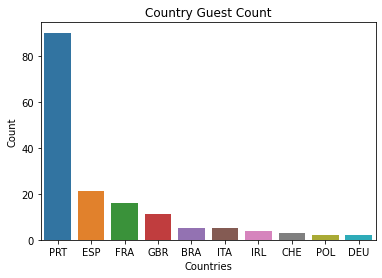

In [4]:
# Your code here (a)
sns.countplot(x=df['country'], order=df['country'].value_counts().iloc[:10].index)
plt.title('Country Guest Count')
plt.xlabel('Countries')
plt.ylabel('Count')

<AxesSubplot:xlabel='country', ylabel='count'>

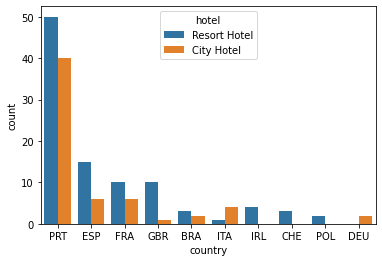

In [5]:
# Your code here (b)
sns.countplot(x=df['country'], hue=df['hotel'], order=df['country'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='country', ylabel='count'>

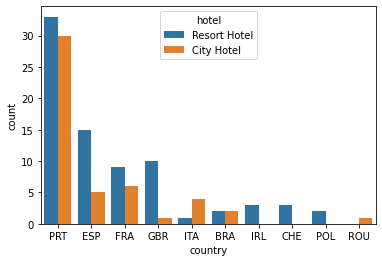

In [6]:
# Your code here (c)
# Get Uncanceled Bookings
nc_df = df[df['is_canceled'] == 0]
sns.countplot(x=nc_df['country'], hue=nc_df['hotel'], order=nc_df['country'].value_counts().iloc[:10].index)

### Question 2
Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of the average amount (adr), the guests are charged per night for each room type.

#### (b)
Repeat (a) but separate the results for each hotel. A single plot should be shown


<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

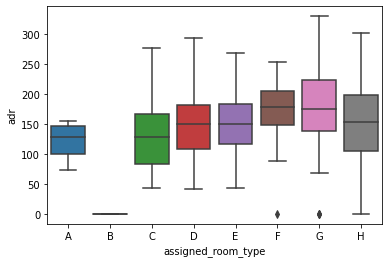

In [7]:
# Your code here (a)
# sns.displot(nc_df, x='adr',hue='assigned_room_type', multiple = 'stack')
sns.boxplot(data=nc_df,x='assigned_room_type',y='adr',order=sorted(nc_df['assigned_room_type'].unique()))

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

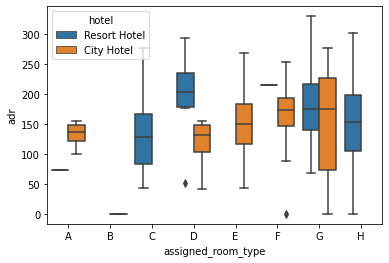

In [8]:
# Your code here (b)
# sns.displot(nc_df, x='adr',hue='assigned_room_type', multiple = 'stack', col='hotel')
sns.boxplot(data=nc_df,x='assigned_room_type',y='adr',hue="hotel", order=sorted(nc_df['assigned_room_type'].unique()))

### Question 3
Consider the non-cancelled bookings only.

#### (a)
Plot the mean values for `adr` by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the mean values for `adr` by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.



Text(0.5, 1.0, 'Monthly ADR MEAN')

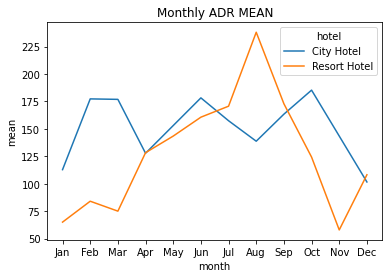

In [9]:
# Your code here (a)
monthly_adr_mean = nc_df.groupby(['arrival_date_month','hotel'])['adr'].mean().to_frame(name='mean').reset_index()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_adr_mean['month'] = monthly_adr_mean['arrival_date_month'].str[:3]
monthly_adr_mean['month'] = pd.Categorical(monthly_adr_mean['month'], categories=month_order, ordered=True)
monthly_adr_mean = monthly_adr_mean.sort_values('month')

sns.lineplot(data=monthly_adr_mean,x='month',y='mean',hue='hotel')
plt.title('Monthly ADR MEAN')

/tmp/ipykernel_165920/1915264532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_df['date'] = pd.to_datetime(nc_df['reservation_status_date'])
/tmp/ipykernel_165920/1915264532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_df['week_day'] = nc_df['date'].dt.day_name().str[:3]


<AxesSubplot:xlabel='week_day', ylabel='mean'>

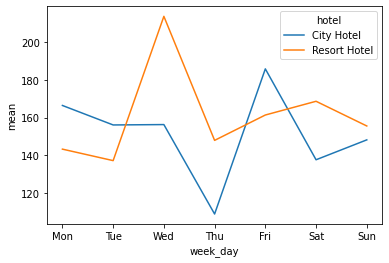

In [10]:
# Your code here (B)
nc_df['date'] = pd.to_datetime(nc_df['reservation_status_date'])
nc_df['week_day'] = nc_df['date'].dt.day_name().str[:3]
daily_adr_mean = nc_df.groupby(['week_day','hotel'])['adr'].mean().to_frame(name='mean').reset_index()
week_day_ordered = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
daily_adr_mean['week_day'] = pd.Categorical(daily_adr_mean['week_day'],categories=week_day_ordered,ordered=True)
daily_adr_mean = daily_adr_mean.sort_values('week_day')

sns.lineplot(data=daily_adr_mean,x='week_day',y='mean',hue='hotel')

### Question 4

Consider the non-cancelled bookings only.

#### (a)

Plot the guest counts by month. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

#### (b)
Plot the guest counts by day of the week. Show the values separately for each hotel. Also, ensure that the axis elements are appropriately ordered.

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

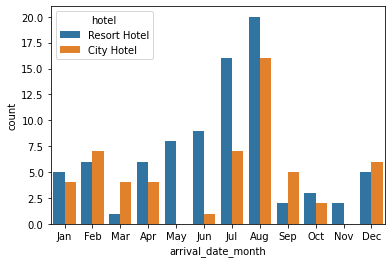

In [11]:
# Your code here (a)

sns.countplot(x=nc_df['arrival_date_month'].str[:3],hue=nc_df['hotel'],order=month_order)

<AxesSubplot:xlabel='week_day', ylabel='count'>

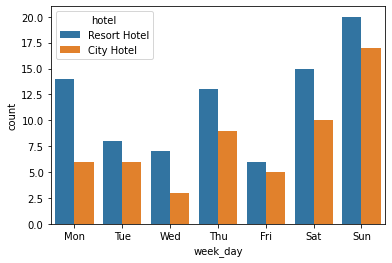

In [12]:
# Your code here (b)
sns.countplot(x=nc_df['week_day'].str[:3],hue=nc_df['hotel'],order=week_day_ordered)

### Question 5

Consider the non-cancelled bookings only.

#### (a)
Plot the distribution of stay duration (in number of days) of guests at each hotel.

/tmp/ipykernel_165920/2234866049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc_df['stay_duration'] = nc_df['stays_in_week_nights'] + nc_df['stays_in_weekend_nights']


<AxesSubplot:xlabel='stay_duration', ylabel='count'>

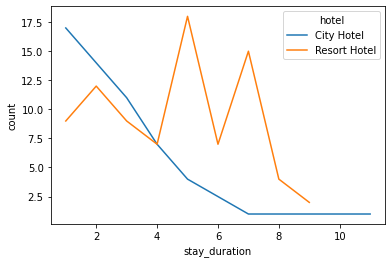

In [13]:
# Your code here (a)
nc_df['stay_duration'] = nc_df['stays_in_week_nights'] + nc_df['stays_in_weekend_nights']
stay_duration_df = nc_df.groupby(['stay_duration','hotel'])['is_canceled'].count().to_frame(name='count').reset_index()
sns.lineplot(data=stay_duration_df,x='stay_duration',y='count',hue='hotel')

### Question 6

#### (a), (b) & (c)
Make three visualizations, showing some interesting insights from the data. 

The visualizations should be accompanied by a brief textual description highlighting your finding.

<AxesSubplot:xlabel='arrival_date_year', ylabel='lead_time'>

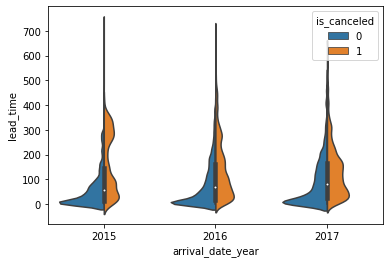

In [135]:
# Your code here (a)
sns.violinplot(data=df, x='arrival_date_year',y='lead_time',hue='is_canceled', split=True)

Three violin plots are correponding to three different years. For canceled booking, means and interquartile ranges are similar in all years. But the shapes of the distributions are quite different from each other. On the other hand distribution of not-canceled booking are almost the same. For all years and every booking situation, the small number of large lead time values are pulling the mean up. It shows that the mean is higher than the median.

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

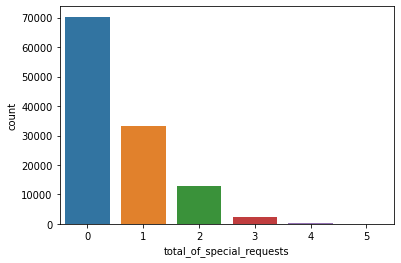

In [149]:
# Your code here (b)
sns.countplot(data=df, x='total_of_special_requests')

Most of the bookings don't have any special request

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

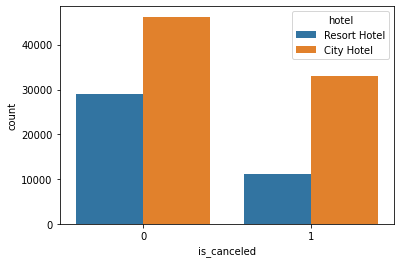

In [150]:
# Your code here (c)
sns.countplot(data=df, x='is_canceled',hue='hotel')

Most of the bookings are uncanceled and resort hotel has less uncanceled and canceled bookings

## Part B - Pre-processing

For this part, **you are required to document the reasoning behind all the data transformations you devise and the insights you gain from each question.** Create **markdown cells** to add your answers. 

### Task Description

The task is to classify whether a booking will be cancelled or not. 


### Question 1
**Feature Selection**

#### (a)
List the features which seem to contribute to data leakage. These will be the features which are related to the predicitve target, but would not be available at prediction time in a real-world setting. 

#### (b)
Find out the percent of missing values of each column and visualize using [missingno](https://github.com/ResidentMario/missingno) . Which features have too many missing values? And which features have sufficiently low number of missing values, such that they can be safely imputed without significantly affecting the overall data distribution.

#### (c)
Visualize the correlations among the different input features.

#### (d)
Find out the correlation of each of the input features with the target attribute.

#### (e)
Using your answers to the previous parts, filter out the irrelevant features from the dataset.

Remember to document your findings for each part.

In [17]:
# Your code here (a)
data_leakage_features = ['arrival_date_year', 'assigned_room_type', 'booking_changes','reservation_status', 'country', 'days_in_waiting_list']

<AxesSubplot:>

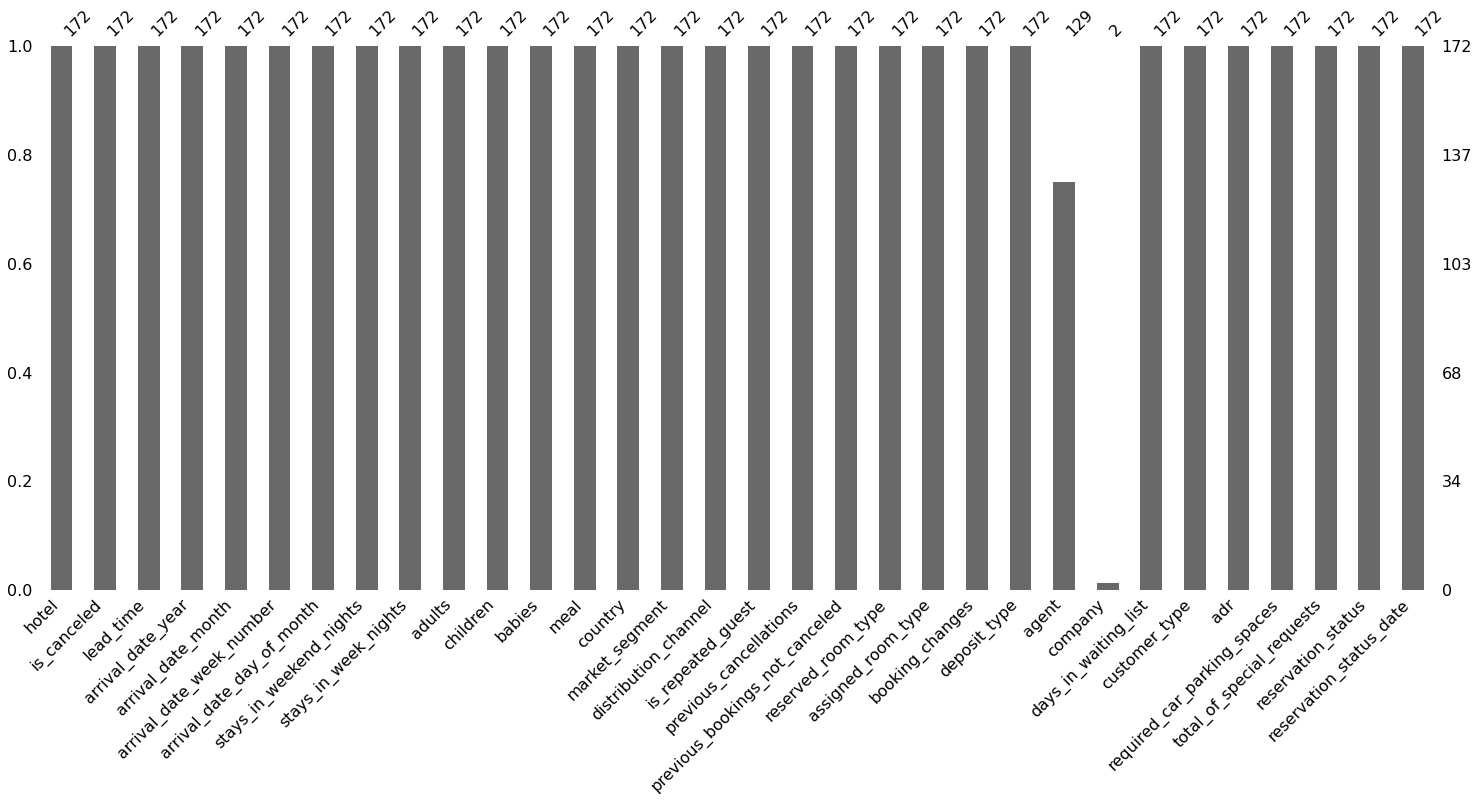

In [18]:
# Your code here (b)
msno.bar(df)

<AxesSubplot:>

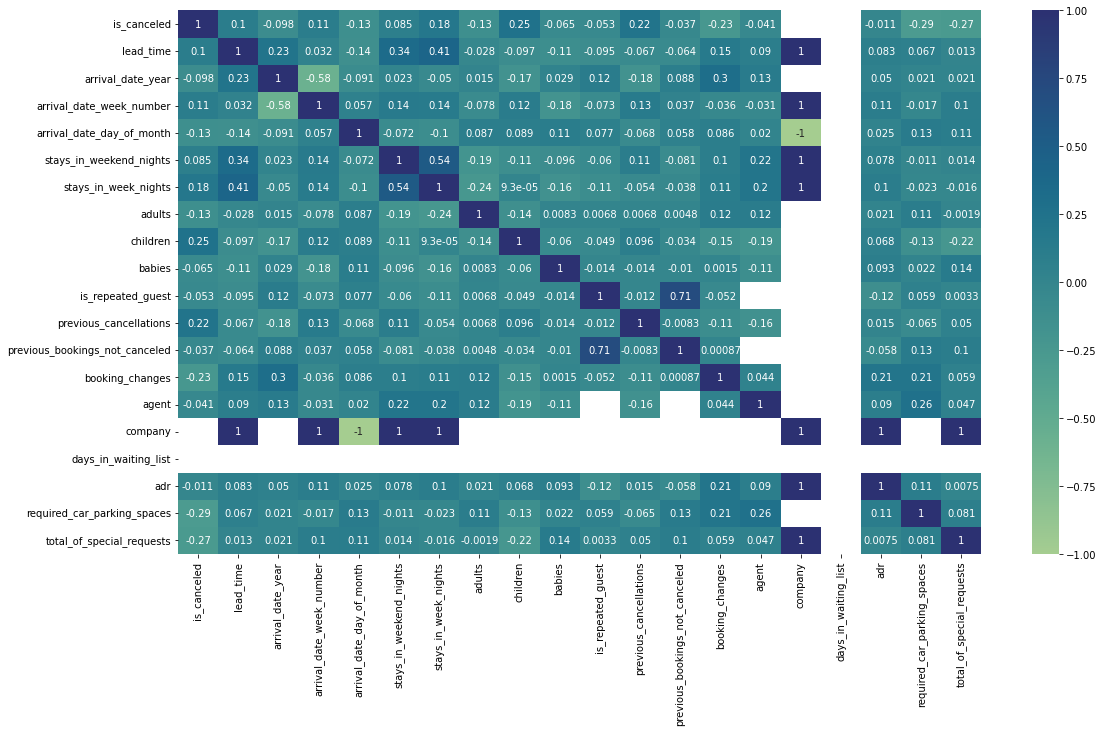

In [19]:
# Your code here (c)
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True,cmap='crest')

In [20]:
# Your code here (d)
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation = correlation.fillna(0)


In [21]:
# Your code here (e)
irrelevant_features = ['days_in_waiting_list','company'] + data_leakage_features
df.drop(irrelevant_features, axis=1, inplace=True)
df.head(5)

/tmp/ipykernel_165920/2423667826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(irrelevant_features, axis=1, inplace=True)


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
272,Resort Hotel,0,87,July,28,10,2,5,2,1.0,...,0,0,C,No Deposit,5.0,Transient,133.83,0,2,2015-07-17
521,Resort Hotel,0,106,July,29,18,2,3,2,1.0,...,0,0,C,No Deposit,NaN,Transient,126.00,0,2,2015-07-23
951,Resort Hotel,0,116,August,32,7,2,5,2,1.0,...,0,0,C,No Deposit,5.0,Transient,133.50,1,2,2015-08-14
998,Resort Hotel,0,81,August,33,9,2,4,2,1.0,...,0,0,C,No Deposit,250.0,Transient,277.00,1,1,2015-08-15
1081,Resort Hotel,0,47,August,33,13,0,3,2,1.0,...,0,0,C,No Deposit,242.0,Transient,255.00,0,2,2015-08-16


### Question 2

For this question, use sklearn transformations. 

Develop appropriate encoding and scaling steps for the categorical and numerical columns in your dataset respectively. 

For this question, a single sklearn `Transformer` should be developed which can be applied for the entire dataset.
If separate transformations need to be applied for different columns, then compose them into a single transformation using sklearn's `ColumnTransformer`.  

In [28]:
# Your code here
cat_cols = list(df.select_dtypes(include=['object', 'bool']).columns)
cat_cols

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [23]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

df.drop('arrival_date_month',axis=1,inplace=True)
df.drop('reservation_status_date',axis=1,inplace=True)

cat_cols.remove('reservation_status_date')
cat_cols.remove('arrival_date_month')

cat_cols

/tmp/ipykernel_165920/1005594567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
/tmp/ipykernel_165920/1005594567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['reservation_status_date'].dt.year
/tmp/ipykernel_165920/1005594567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [33]:
num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_cols.remove('is_canceled')
num_cols

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'year',
 'month',
 'day']

In [34]:
y_data = df['is_canceled']
X_data = df.drop('is_canceled',axis=1)
X_data.head(5)

,hotel,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,year,month,day
272,Resort Hotel,87,28,10,2,5,2,1.0,1,FB,...,C,No Deposit,5.0,Transient,133.83,0,2,2015,7,17
521,Resort Hotel,106,29,18,2,3,2,1.0,1,BB,...,C,No Deposit,NaN,Transient,126.00,0,2,2015,7,23
951,Resort Hotel,116,32,7,2,5,2,1.0,1,BB,...,C,No Deposit,5.0,Transient,133.50,1,2,2015,8,14
998,Resort Hotel,81,33,9,2,4,2,1.0,1,FB,...,C,No Deposit,250.0,Transient,277.00,1,1,2015,8,15
1081,Resort Hotel,47,33,13,0,3,2,1.0,1,HB,...,C,No Deposit,242.0,Transient,255.00,0,2,2015,8,16


In [52]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler


ct = ColumnTransformer([
    ('num',make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()),num_cols),
    ('cat',make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')),cat_cols)
])


## Part C - Modeling

Now, you will be training different ML models to perform the required predictive task. Specifically, the following classification models will be trained:
* kNN
* Naive Bayes
* Decision tree
* [xgboost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) 

### Question 1

Split your data into training and testing data, with 85% of the dataset going to testing data. Set a suitable seed value so that the splits are reproducible

In [109]:
### Your code here
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_data,y_data, test_size = 0.15, stratify=y_data, random_state=0)

### Question 2

For each of the required models perform the following tasks:
* Compose an sklearn pipeline with the developed pre-processing (developed in the previous part) and the model.
* Train the model with default hyper-parameters and report its evlauation score on the test set.
* Tune the hyper-parameters of the model with `GridSearchCV`.
* Report the accuracy, balanced accuracy, F1, ROC AUC and average predicion scores of the best model on the test set.

#### kNN

In [98]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,roc_auc_score,average_precision_score, confusion_matrix, classification_report
pred_data = {}

def model_stats(y, y_hat):
    acc = accuracy_score(y,y_hat)
    bacc = balanced_accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat)
    roc = roc_auc_score(y,y_hat)
    aps = average_precision_score(y,y_hat)
    
    print('Accuracy Score', acc)
    print('Balanced Accuracy', bacc)
    print('F1 Score', f1)
    print('ROC AUC', roc)
    print('Average Precision Score', aps)
    
    clas_report = classification_report(y,y_hat)
    cnf_mat = confusion_matrix(y,y_hat)
    
    print(clas_report)
    print(cnf_mat)
    
    return {'Acc':acc, 'Bal_Acc':bacc, 'f1':f1, 'roc':roc, 'aps':aps}

In [110]:
### Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', knn)
])
knn_pipe.fit(X_train,y_train)
knn_pipe.score(X_test,y_test)

0.8461538461538461

In [111]:
### Your code here
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_neighbors': [5,10,15,20,30],
    'model__weights': ['uniform','distance']
}

knn_grid = GridSearchCV(knn_pipe,param_grid)
knn_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['lead_time',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'is_repeated_guest',
                                                                          'previous_...
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                                          'customer_type'])])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [5, 10, 15, 20, 30],
                         'model__weights': ['uniform', 'distance']})

In [112]:
knn_grid.best_params_

{'model__n_neighbors': 10, 'model__weights': 'uniform'}

In [113]:
### Your code here
best_knn_pipe = knn_grid.best_estimator_
pred_data['knn'] = model_stats(y_test,best_knn_pipe.predict(X_test))

Accuracy Score 0.8461538461538461
Balanced Accuracy 0.6
F1 Score 0.33333333333333337
ROC AUC 0.6
Average Precision Score 0.35384615384615387
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.20      0.33         5

    accuracy                           0.85        26
   macro avg       0.92      0.60      0.62        26
weighted avg       0.87      0.85      0.80        26

[[21  0]
 [ 4  1]]


#### Naive Bayes

In [114]:
### Your code here
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', nb)
])
nb_pipe.fit(X_train,y_train)
nb_pipe.score(X_test,y_test)

0.6153846153846154

In [115]:
### Your code here
param_grid = {
    'model__var_smoothing': np.logspace(0,-9, num = 100),
}

nb_grid = GridSearchCV(nb_pipe,param_grid)
nb_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['lead_time',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'is_repeated_guest',
                                                                          'previous_...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [116]:
nb_grid.best_params_

{'model__var_smoothing': 1.0}

In [117]:
### Your code here
best_nb_pipe = nb_grid.best_estimator_
pred_data['naive'] = model_stats(y_test,best_nb_pipe.predict(X_test))

Accuracy Score 0.8846153846153846
Balanced Accuracy 0.7761904761904761
F1 Score 0.6666666666666665
ROC AUC 0.7761904761904761
Average Precision Score 0.5269230769230768
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.75      0.60      0.67         5

    accuracy                           0.88        26
   macro avg       0.83      0.78      0.80        26
weighted avg       0.88      0.88      0.88        26

[[20  1]
 [ 2  3]]


#### Decision Tree

In [118]:
### Your code here
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', dtc)
])
dtc_pipe.fit(X_train,y_train)
dtc_pipe.score(X_test,y_test)

0.7692307692307693

In [119]:
### Your code here
param_grid = {
    'model__criterion': ['gini','entropy'],
    'model__splitter': ['best','random'],
}

dtc_grid = GridSearchCV(dtc_pipe,param_grid)
dtc_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['lead_time',
                                                                          'arrival_date_week_number',
                                                                          'arrival_date_day_of_month',
                                                                          'stays_in_weekend_nights',
                                                                          'stays_in_week_nights',
                                                                          'adults',
                                                                          'children',
                                                                          'babies',
                                                                          'is_repeated_guest',
                                                                          'previous_...
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['hotel',
                                                                          'meal',
                                                                          'market_segment',
                                                                          'distribution_channel',
                                                                          'reserved_room_type',
                                                                          'deposit_type',
                                                                          'customer_type'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__splitter': ['best', 'random']})

In [120]:
dtc_grid.best_params_

{'model__criterion': 'gini', 'model__splitter': 'random'}

In [121]:
### Your code here
best_dtc_pipe = dtc_grid.best_estimator_
pred_data['DTC'] = model_stats(y_test,best_dtc_pipe.predict(X_test))

Accuracy Score 0.8076923076923077
Balanced Accuracy 0.7285714285714285
F1 Score 0.5454545454545454
ROC AUC 0.7285714285714286
Average Precision Score 0.3769230769230769
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.50      0.60      0.55         5

    accuracy                           0.81        26
   macro avg       0.70      0.73      0.71        26
weighted avg       0.82      0.81      0.81        26

[[18  3]
 [ 2  3]]


#### xgboost

In [122]:
### Your code here
### Your code here
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_pipe = Pipeline(steps=[
    ('prep',ct),
    ('model', xgb)
])
xgb_pipe.fit(X_train,y_train)
xgb_pipe.score(X_test,y_test)

0.8461538461538461

In [123]:
### Your code here
pred_data['xgb'] = model_stats(y_test,xgb_pipe.predict(X_test))

Accuracy Score 0.8461538461538461
Balanced Accuracy 0.6761904761904762
F1 Score 0.5
ROC AUC 0.6761904761904761
Average Precision Score 0.382051282051282
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.67      0.40      0.50         5

    accuracy                           0.85        26
   macro avg       0.77      0.68      0.70        26
weighted avg       0.83      0.85      0.83        26

[[20  1]
 [ 3  2]]


### Question 3

#### (a)
Plot a bar chart showing the results of the different models (the tuned ones). Show the following metrics:
* Accuracy
* Balanced accuracy
* F1 score
* ROC AUC 
* Average precision

#### (b)
Describe your results for different models and your performance in comparison to the random selection baseline.

#### (c)
Which of the above is the most suitable metric for evaluation in this case? Justify your answer. Now with that metric, select which model performed the best? This model is now your best overall model.

<AxesSubplot:xlabel='model', ylabel='score'>

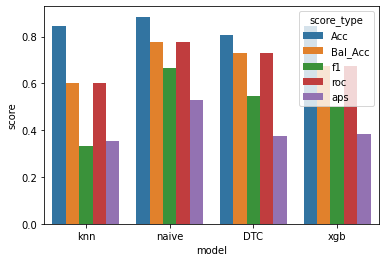

In [124]:
### Your code here (a)
# pred_df = pd.DataFrame(pred_data).reset_index()
# sns.barplot(data=pred_df,x='index')
pred_df = pd.DataFrame(columns=['model','score_type','score'])
for mk,mv in pred_data.items():
    for sk,sv in pred_data[mk].items():
        pred_df.loc[len(pred_df)] = [mk,sk,sv]
        
sns.barplot(data=pred_df, x='model', y='score', hue='score_type')

For KNN accuracy is closer to the best model but other metric values are not good. Naive Bays generated the best results in this experiment with highed accuracy, balanced accuracy f1 score, roc and aps. DTC is the second best model. XGB does not show good f1, and average precision score.

F1 Score is the most suitable option in this case. It takes precesion and recall into its consideration for calculation and works fine even with imbalanced datasets.
Naive Bays is the best model if we compare all of its metrices with other metrices.

### Question 4
Using your best overall model, plot the following:

#### (a)
Confusion Matrix (appropriate labels should be shown)

#### (b)
Precision Recall curve

#### (c)
ROC curve (Also show ROC for random classifier on the same plot)

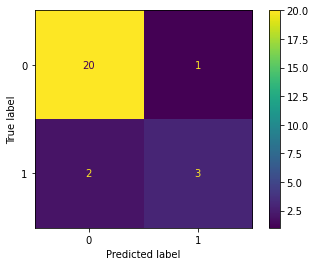

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_nb_pipe,X_test,y_test)

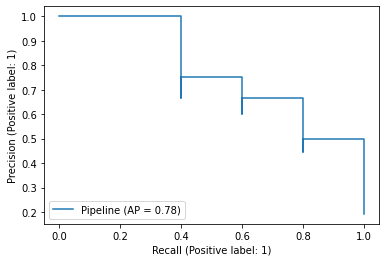

In [130]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(best_nb_pipe,X_test,y_test)

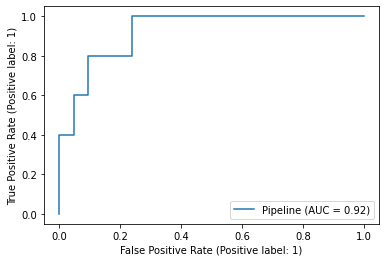

In [131]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_nb_pipe,X_test,y_test)